In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [11]:
eq_wiki = pd.read_csv('data/clean.csv')
eq_wiki.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


### Relabeled column names

In [12]:
eq_wiki.columns = ['origin', 'present_day_country', 'lat', 'long', 'depth', 'magnitude', 'secondary_effects', 'pde_shaking_deaths','pde_total_deaths', 'utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths']

### Dropped footnotes, commas, and other junk data

In [13]:
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r",",'').str.strip()
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r"+",'').str.strip()
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r"*",'').str.strip()
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r"\[\d*\]","").str.strip()
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r"\(.*\)","").str.strip()

### Replaced cells with multiples numbers into string and separated into columns

In [14]:
eq_wiki['other_source_deaths'] = eq_wiki['other_source_deaths'].str.replace(r" ", "-")
eq_wiki['number1']= eq_wiki.other_source_deaths.str.split('-').str[2].astype(float)
eq_wiki['number']= eq_wiki.other_source_deaths.str.split('-').str[1].astype(float)
eq_wiki['other_source_deaths']= eq_wiki.other_source_deaths.str.split('-').str[0].astype(float)

### Created another column called deaths that contained the maximum amount of deaths across all columns

In [15]:
eq_wiki['deaths'] = eq_wiki[['pde_total_deaths','utsu_total_deaths','em_dat_total_deaths','other_source_deaths','number1','number']].max(axis=1)

### Dropped unnecessary columns

In [16]:
eq_wiki = eq_wiki.drop(['pde_shaking_deaths', 'pde_total_deaths','utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths', 'number1', 'number'], axis = 1)

### Cleaned magnitude, present country columns. Added month and year column

In [17]:
eq_wiki['magnitude'] = eq_wiki['magnitude'].str.extract('(\d*\.?\d*)', expand=False).astype(float)
eq_wiki['present_day_country'] = eq_wiki['present_day_country'].str.replace(r"\(.*\)","").str.replace(r"\(.*","").str.strip()
eq_wiki['year'] = pd.DatetimeIndex(eq_wiki['origin']).year
eq_wiki['month'] = pd.DatetimeIndex(eq_wiki['origin']).month
eq_wiki.head(20)


,origin,present_day_country,lat,long,depth,magnitude,secondary_effects,deaths,year,month
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,1900,5
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,140.0,1900,7
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,1900,10
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,1901,2
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,4.0,1901,3
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,1901,8
6,1901-11-15 20:15,New Zealand,-43.000,173.000,0,6.8,NaN,1.0,1901,11
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,1.0,1902,1
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,86.0,1902,2
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,4.0,1902,3


### Read in gdp data

In [18]:
eq_wiki.to_csv('data/quakes_wiki.csv', index=False)

In [19]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', skipfooter=2, engine='python')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN


In [20]:
gdp_df.rename(columns={"Country or Area": "present_day_country", "Year": "year", "Value":"gdp"}, inplace=True)
gdp_df= gdp_df.drop(['Value Footnotes'], axis=1)

### Merged GDP data with earthquake data

In [21]:
eq_gdp_df= pd.merge(gdp_df,eq_wiki, on= ['present_day_country', 'year'])
eq_gdp_df

,present_day_country,year,gdp,origin,lat,long,depth,magnitude,secondary_effects,deaths,month
0,Afghanistan,2005,1099.104568,2005-12-12 21:47,36.285,71.120,223.8,6.5,NaN,5.0,12
1,Afghanistan,2004,1025.208245,2004-04-05 21:24,36.480,71.042,175,6.5,NaN,3.0,4
2,Afghanistan,2004,1025.208245,2004-07-18 08:31,33.344,69.479,5.7,5.2,NaN,2.0,7
3,Afghanistan,2003,1055.557459,2003-03-29 11:46,35.907,70.550,110,5.8,NaN,1.0,3
4,Afghanistan,2002,1016.245409,2002-03-03 12:08,36.508,70.503,204,7.3,L,166.0,3
5,Afghanistan,2002,1016.245409,2002-03-25 14:56,36.051,69.210,10.5,6.1,L,1000.0,3
6,Afghanistan,2002,1016.245409,2002-03-27 08:52,36.053,69.248,9.1,5.6,L,NaN,3
7,Afghanistan,2002,1016.245409,2002-04-12 04:00,35.988,69.296,7.8,5.8,L,50.0,4
8,Algeria,2008,12707.831354,2008-01-09 22:24,35.616,-0.570,10,4.6,NaN,1.0,1
9,Algeria,2008,12707.831354,2008-06-06 20:02,35.883,-0.658,4,5.5,NaN,1.0,6


In [22]:
eq_gdp_df= eq_gdp_df.fillna(0)

In [28]:
eq_gdp_df.present_day_country.unique()

array(['Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'Burundi', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Cyprus', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'France', 'Georgia', 'Greece',
       'Guatemala', 'Haiti', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Malaysia', 'Mexico',
       'Morocco', 'Mozambique', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Pakistan', 'Panama', 'Papua New Guinea', 'Peru', 'Philippines',
       'Portugal', 'Romania', 'Rwanda', 'Samoa', 'Serbia', 'Slovenia',
       'Solomon Islands', 'South Africa', 'Spain', 'Sudan', 'Tajikistan',
       'Tanzania', 'Turkey', 'Turkmenistan', 'Uganda', 'United States',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen'],
      dtype=object)

In [23]:
eq_gdp_df['year'].describe()

count     432.000000
mean     1999.520833
std         5.747553
min      1990.000000
25%      1994.750000
50%      2000.000000
75%      2004.000000
max      2011.000000
Name: year, dtype: float64

### Found correlation between gdp and deaths by earthquake

In [16]:
eq_gdp_df[['deaths', 'gdp']].corr()

,deaths,gdp
deaths,1.000000,-0.045341
gdp,-0.045341,1.000000


In [17]:
x = eq_gdp_df['deaths']
x = sm.add_constant(x)
y = eq_gdp_df['gdp']
model = sm.OLS(y, x)
eq_vs_gdp = model.fit()
eq_vs_gdp.summary()

C:\Users\DP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8858
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.347
Time:                        16:38:55   Log-Likelihood:                -4575.7
No. Observations:                 432   AIC:                             9155.
Df Residuals:                     430   BIC:                             9164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.068e+04    467.379     22.857      0.000    9764.145    1.16e+04
deaths        -0.0229      0.024     -0.941      0.347      -0.071       0.025
==============================================================================
Omnibus:                      127.822   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.836
Skew:                           1.630   Prob(JB):                     6.23e-57
Kurtosis:                       4.938   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

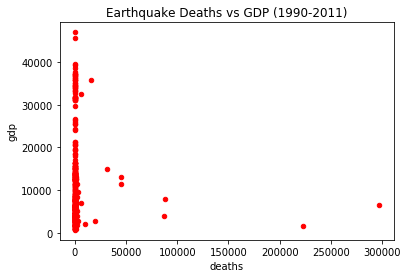

In [18]:
eq_gdp_df.plot(kind='scatter', x='deaths', y='gdp', c= "r", title = ("Earthquake Deaths vs GDP (1990-2011)"))

In [18]:
#plt.pcolor(eq_gdp_df)
#plt.yticks(np.arange(0.5, len(eq_gdp_df.index), 1), eq_gdp_df.index)
#plt.xticks(np.arange(0.5, len(eq_gdp_df.columns), 1), eq_gdp_df.columns)
#plt.show()

In [19]:
top_15 = eq_wiki.sort_values(by=['deaths'], ascending=False)
top_15 = top_15.head(15)

In [20]:
top_15 = top_15.groupby('present_day_country')['deaths'].sum()
top_15

present_day_country
China        1059026.0
Haiti         222517.0
Indonesia     297200.0
Iran           45000.0
Italy         114610.0
Japan         142807.0
Pakistan      147351.0
Peru           70000.0
Turkey         77968.0
Name: deaths, dtype: float64

In [21]:
from pygal_maps_world.maps import World
wm = World()
wm.force_uri_protocol = 'http'
wm.title="Highest Deaths by Country"
wm.add('Top 15 Earthquake Countries by Death',{'cn': 1059026,'id': 297200,'ht': 222517,'pk': 147351,'jp': 142807,'pe': 70000, 'ir': 45000,'it': 114610,'tr': 77968})
wm.render_to_file('map.svg')


In [22]:
eq_countries = eq_wiki.drop_duplicates(subset=['present_day_country'], keep='first')
eq_countries.head()

,origin,present_day_country,lat,long,depth,magnitude,secondary_effects,deaths,year,month
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,1900,5
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,140.0,1900,7
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,1900,10
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,1901,2
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,4.0,1901,3


In [23]:
from pygal_maps_world.maps import World
wm = World()
wm.force_uri_protocol = 'http'
wm.title="Map of Earthquakes from 1900-2018"
wm.add('Earthquake Countries',{'ca': 84949494949,'mx': 494794164,'us': 99794616})
wm.render_to_file('map')

In [19]:
predictors = ['present_day_country', 'year',
       'magnitude']

In [20]:
def find_adj_r2(predictors):
    X = sm.add_constant(eq_gdp_df[predictors])
    y = eq_gdp_df['deaths']
    model = sm.OLS(y,X)
    res = model.fit()
    return res.rsquared_adj

In [22]:
find_adj_r2(['magnitude', 'year'])

0.042931067033229686